# Description

- Initialize with returns, predictions, target volatility, and oos start date
- Evaluate portfolios generated from the predictions

# Imports

In [1]:
%load_ext autoreload
%autoreload 2

import logging

import numpy as np
import pandas as pd

import core.artificial_signal_generators as sig_gen
import core.config as cconfig
import core.dataflow_model.model_evaluator as modeval
import core.dataflow_model.model_plotter as modplot
import core.dataflow_model.utils as cdmu
import core.statistics as stats
import helpers.dbg as dbg
import helpers.printing as hprint

In [2]:
dbg.init_logger(verbosity=logging.INFO)

_LOG = logging.getLogger(__name__)

# _LOG.info("%s", env.get_system_signature()[0])

hprint.config_notebook()

INFO: > cmd='/venv/lib/python3.8/site-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-73f2af89-9668-48f5-b876-84cc7427f1b6.json'


# Notebook config

In [3]:
#exp_dir = "/app/experiment1"

eval_config = cconfig.get_config_from_nested_dict(
    {
        "exp_dir": exp_dir,
        "model_evaluator_kwargs": {
            "returns_col": "ret_0_vol_adj_2",
            "predictions_col": "ret_0_vol_adj_2_hat",
            "oos_start": "2017-01-01",
        },
        "bh_adj_threshold": 0.1,
        "resample_rule": "W",
        "mode": "ins",
        "target_volatility": 0.1,
    }
)

# Initialize ModelEvaluator and ModelPlotter

In [4]:
# Load the data.
result_bundles = cdmu.yield_experiment_artifacts(
    eval_config["exp_dir"], "result_bundle.pkl",
)

# Build the ModelEvaluator.
evaluator = modeval.build_model_evaluator_from_result_bundles(
    result_bundles,
    abort_on_error = False,
    **eval_config["model_evaluator_kwargs"].to_dict(),
)

# Build the ModelPlotter.
plotter = modplot.ModelPlotter(evaluator)

# Load artifacts 'result_bundle.pkl' from '/app/experiment.RH1E.crypto.crypto_all.5T.20210724-12_45_51'
Found 46 experiment subdirs in '/app/experiment.RH1E.crypto.crypto_all.5T.20210724-12_45_51'


Loading artifacts:   0%|          | 0/46 [00:00<?, ?it/s]

Can't find '/app/experiment.RH1E.crypto.crypto_all.5T.20210724-12_45_51/result_45/result_bundle.pkl': skipping


# Analysis

In [5]:
pnl_stats = evaluator.calculate_stats(
    mode=eval_config["mode"], target_volatility=eval_config["target_volatility"]
)
display(pnl_stats.loc[["signal_quality", "correlation"]])

Calculating positions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating stats:   0%|          | 0/45 [00:00<?, ?it/s]

maxlag must be less than (nobs/2 - 1 - ntrend) where n trend is the number of included deterministic regressors


/venv/lib/python3.8/site-packages/scipy/stats/stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


0         1         2         3         4         5         6         7          8         9         10        11        12        13         14         15        16        17        18        19        20        21        22        23         24        25        26         27        28         29         30        31         32        33        34        35        36        37        38        39        40        41        42        43        44
signal_quality sharpe_ratio                    8.191044  3.806605  2.652287  4.676034  3.807635  2.917397  7.735072   4.86885  30.054989  1.732228  7.021622  2.092256  3.847901  3.074674   9.936535  12.139923  8.192856  3.332385   4.08495  2.401867  4.907899  5.969657  2.060171  4.727498  25.703056  2.958848  7.131385   8.797772    4.1335  14.590591   8.992949  2.980122  12.349611   2.51057   2.37816  3.227071  1.972624  2.907807  1.885948  3.709035   3.22667  2.586282  3.344799  0.832475   0.49564
               sharpe_ratio_standard_error     3.032054  0.828694  0.839014  0.836602  0.743637   1.09028  1.090307   1.21654  22.951221  0.831827  3.032028  0.811327  0.817246  0.781593   3.032099    3.03217   3.03277  0.817244  1.163518  0.811333  1.090288  3.032008   0.84229  1.090287   1.090618  0.844735  1.963442   3.032069  0.816503   1.090386   3.032074   1.09028   3.032177   0.82025  0.831039  0.809882  0.832614  2.131782  1.216948  1.227282  1.227283  1.227225   1.22733   1.18925  1.224715
               sr.tval                         2.702252  4.593832  3.161301   5.58993  5.120846  2.675919  7.096329   4.00262   1.311508  2.082465  2.316375  2.578861  4.708744  3.934075   3.278603   4.006943  2.702264  4.077838  3.511307  2.960483  4.501952  1.969165  2.445962  4.336442  23.639246  3.502836   3.63286   2.902491  5.062896  13.394193   2.967045  2.733472   4.075668  3.060829  2.861748  3.984829  2.369236  1.434331  1.551709  3.022642  2.629529  2.107615  2.725473  0.698823  0.403762
               sr.pval                         0.006898  0.000004  0.001571       0.0       0.0  0.007454       0.0  0.000063   0.190482  0.037302  0.020561  0.009914  0.000002  0.000084   0.001047   0.000062  0.006899  0.000045  0.000446  0.003072  0.000007  0.048962  0.014448  0.000014        0.0   0.00046  0.000281   0.003709       0.0        0.0   0.003014  0.006269   0.000046  0.002208  0.004214  0.000068  0.017826  0.185296  0.121305  0.002508  0.008557  0.035077  0.006424  0.485738  0.686867
               kratio                          7.342966  2.113011  2.178308  2.514606  1.311072  3.747791  1.836031  2.772903  39.624085  1.230275  8.202202  2.123768  3.046392  2.759699   8.457647  11.493589  15.68735  3.599581  2.806094  2.495048  2.465487  4.480084  1.549265  1.685184  14.531006  3.737693  8.379956  10.167272  3.634484   3.330017   7.845827  4.312975  10.912079  3.935605  1.566188  2.726269  1.938111   0.27332  3.182481  3.530182   2.10825  1.826101  2.564311  1.268619  1.534364
               sr_implied_by_prediction_corr   10.01384  7.076932    4.8456  8.970673   7.38946  2.799457  8.408639  4.839707  23.913556  3.082834  9.815191  4.313058  7.856821   5.99998  13.939572  15.339042  9.875561  5.858487  7.315657  4.591371  5.320657  7.172107  3.531224  4.943406  27.699581  5.061228  6.490971   9.143588  8.034771  12.596159  10.909678  3.917627  15.308495  4.960631  4.164803  6.637381  3.643452  4.009561  2.755353  6.368191  5.604062  4.519767  6.291353  0.775361  1.014163
               sr.adj_pval                     0.010014  0.000025  0.003366       0.0  0.000003  0.010482       0.0  0.000202   0.199342  0.043041  0.025006  0.013121  0.000016  0.000235   0.002355   0.000202  0.010014  0.000173  0.001091   0.00553  0.000034  0.055082  0.018576  0.000065        0.0  0.001091  0.000743    0.00642  0.000003        0.0    0.00553  0.009968   0.000173  0.004516  0.007023  0.000203  0.022283  0.198532   0.13314  0.004908  0.011669  0.041539  0.009968  0.496777  0.686867
correlation    predic

## Model selection

Calculating positions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/45 [00:00<?, ?it/s]

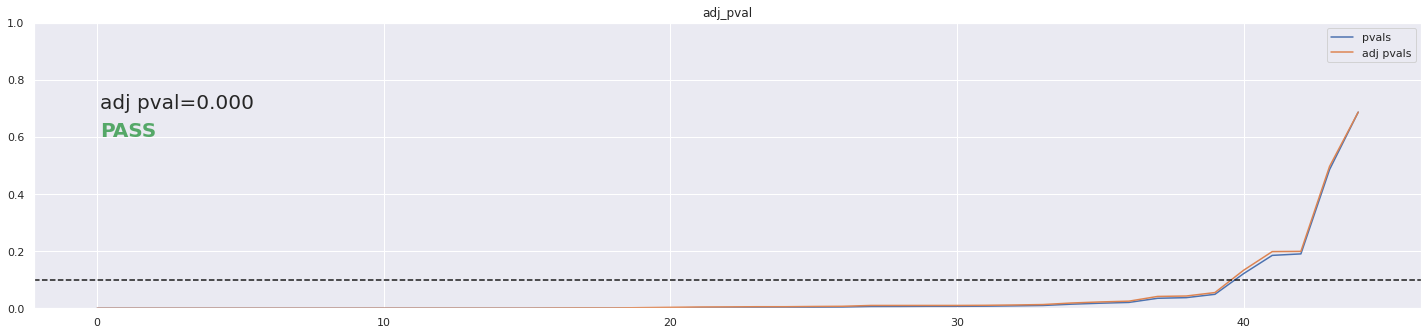

In [6]:
plotter.plot_multiple_tests_adjustment(
    threshold=eval_config["bh_adj_threshold"], mode=eval_config["mode"]
)

In [7]:
# TODO(gp): Move this chunk of code in a function.
col_mask = (
    pnl_stats.loc["signal_quality"].loc["sr.adj_pval"]
    < eval_config["bh_adj_threshold"]
)
selected = pnl_stats.loc[:, col_mask].columns.to_list()
not_selected = pnl_stats.loc[:, ~col_mask].columns.to_list()

print("num model selected=%s" % hprint.perc(len(selected), pnl_stats.shape[1]))
print("model selected=%s" % selected)
print("model not selected=%s" % not_selected)

# Use `selected = None` to show all the models.

num model selected=40 / 45 = 88.89%
model selected=[0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 39, 40, 41, 42]
model not selected=[8, 37, 38, 43, 44]


Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

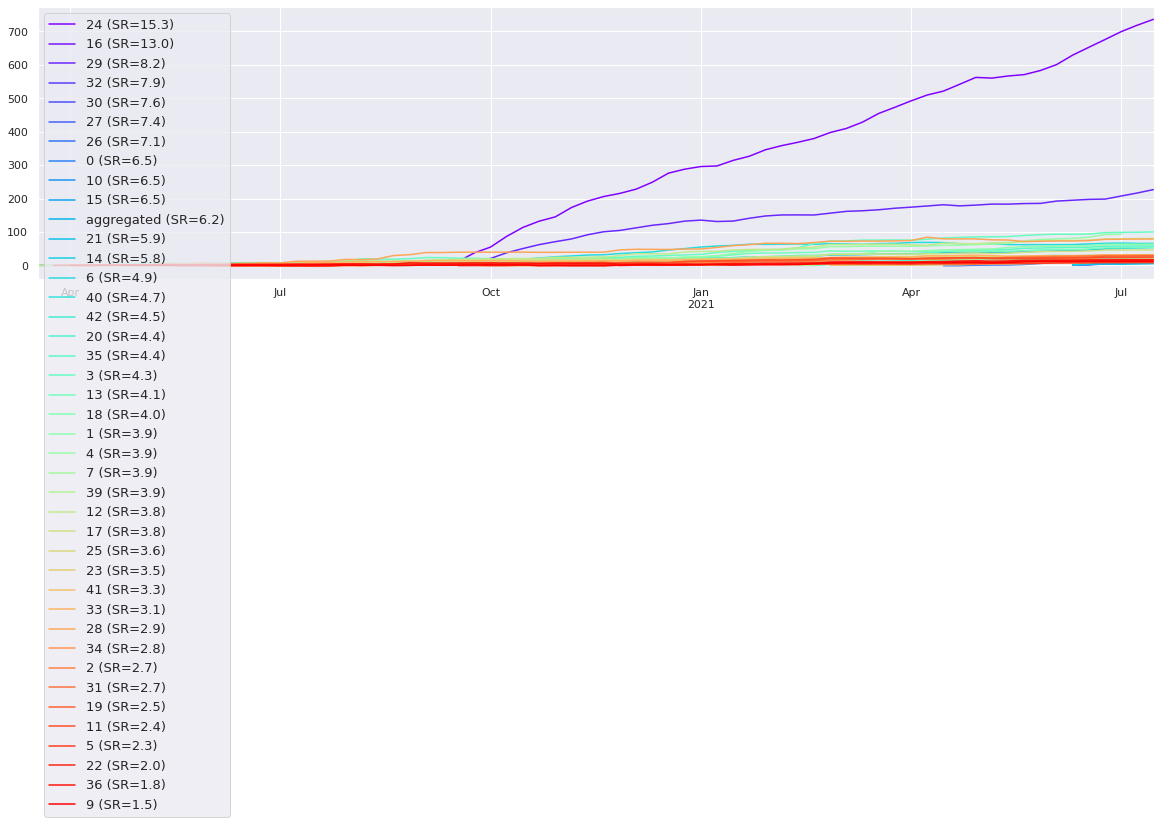

In [8]:
plotter.plot_multiple_pnls(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Return correlation

Calculating positions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/45 [00:00<?, ?it/s]

The corr_df.shape[0]='45' > 20


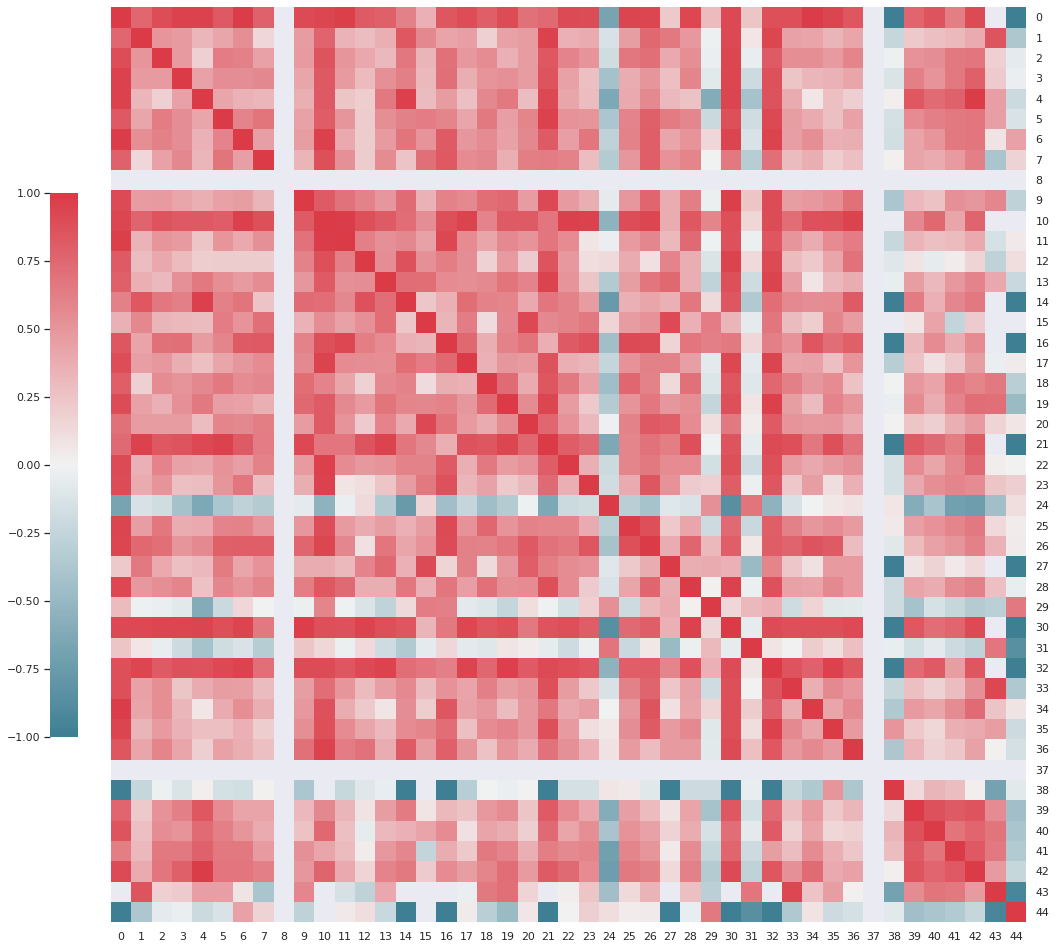

In [9]:
plotter.plot_correlation_matrix(
    series="returns",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Model correlation

Calculating positions:   0%|          | 0/45 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/45 [00:00<?, ?it/s]

The corr_df.shape[0]='45' > 20


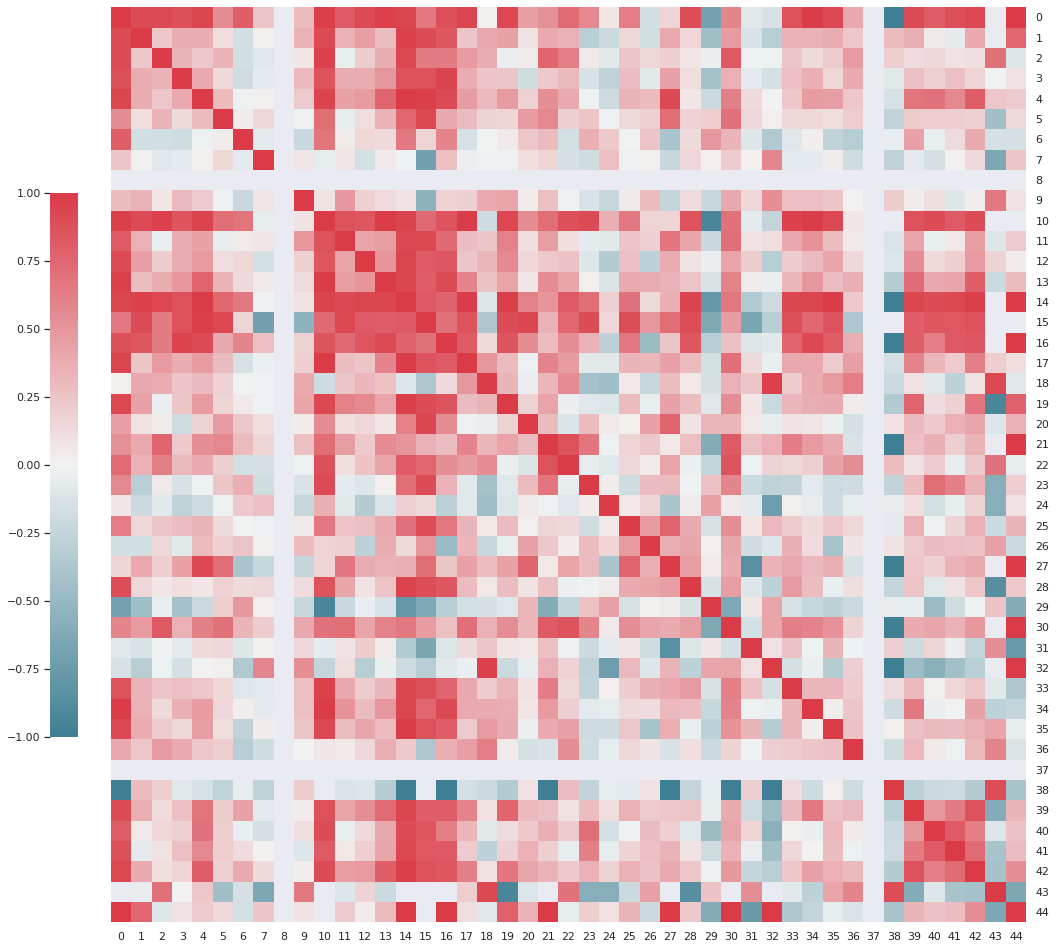

In [10]:
plotter.plot_correlation_matrix(
    series="pnl",
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)

## Aggregate model

In [18]:
pnl_srs, pos_srs, aggregate_stats = evaluator.aggregate_models(
    keys=selected,
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)
display(aggregate_stats)

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

finance         avg_turnover_(%)                                     23.796639
                turnover_frequency                                    <Minute>
                avg_holding_period                                    4.202274
                holding_period_units                                  <Minute>
sampling        start_time                           2020-03-17 12:17:00-04:00
                end_time                             2021-07-16 15:58:00-04:00
                n_sampling_points                                       133506
                frequency                                             <Minute>
                sampling_points_per_year                            525780.125
                time_span_in_years                                    1.331473
                n_rows                                                975281.0
                frac_zero                                               0.0003
                frac_nan                            

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

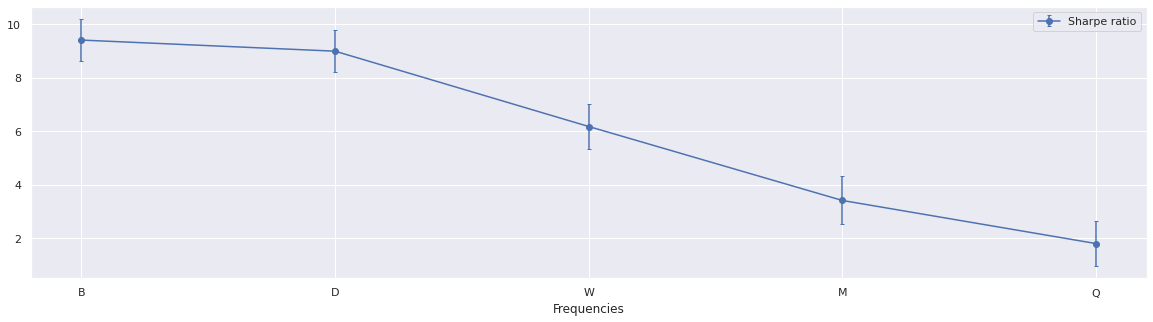

In [12]:
plotter.plot_sharpe_ratio_panel(keys=selected, mode=eval_config["mode"])

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

/venv/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 98, using nperseg = 98
  warnings.warn('nperseg = {0:d} is greater than input length '
/venv/lib/python3.8/site-packages/scipy/signal/spectral.py:1961: UserWarning: nperseg = 256 is greater than input length  = 98, using nperseg = 98
  warnings.warn('nperseg = {0:d} is greater than input length '
/app/amp/core/plotting.py:735: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax2.pcolormesh(t, f_sxx, Sxx)


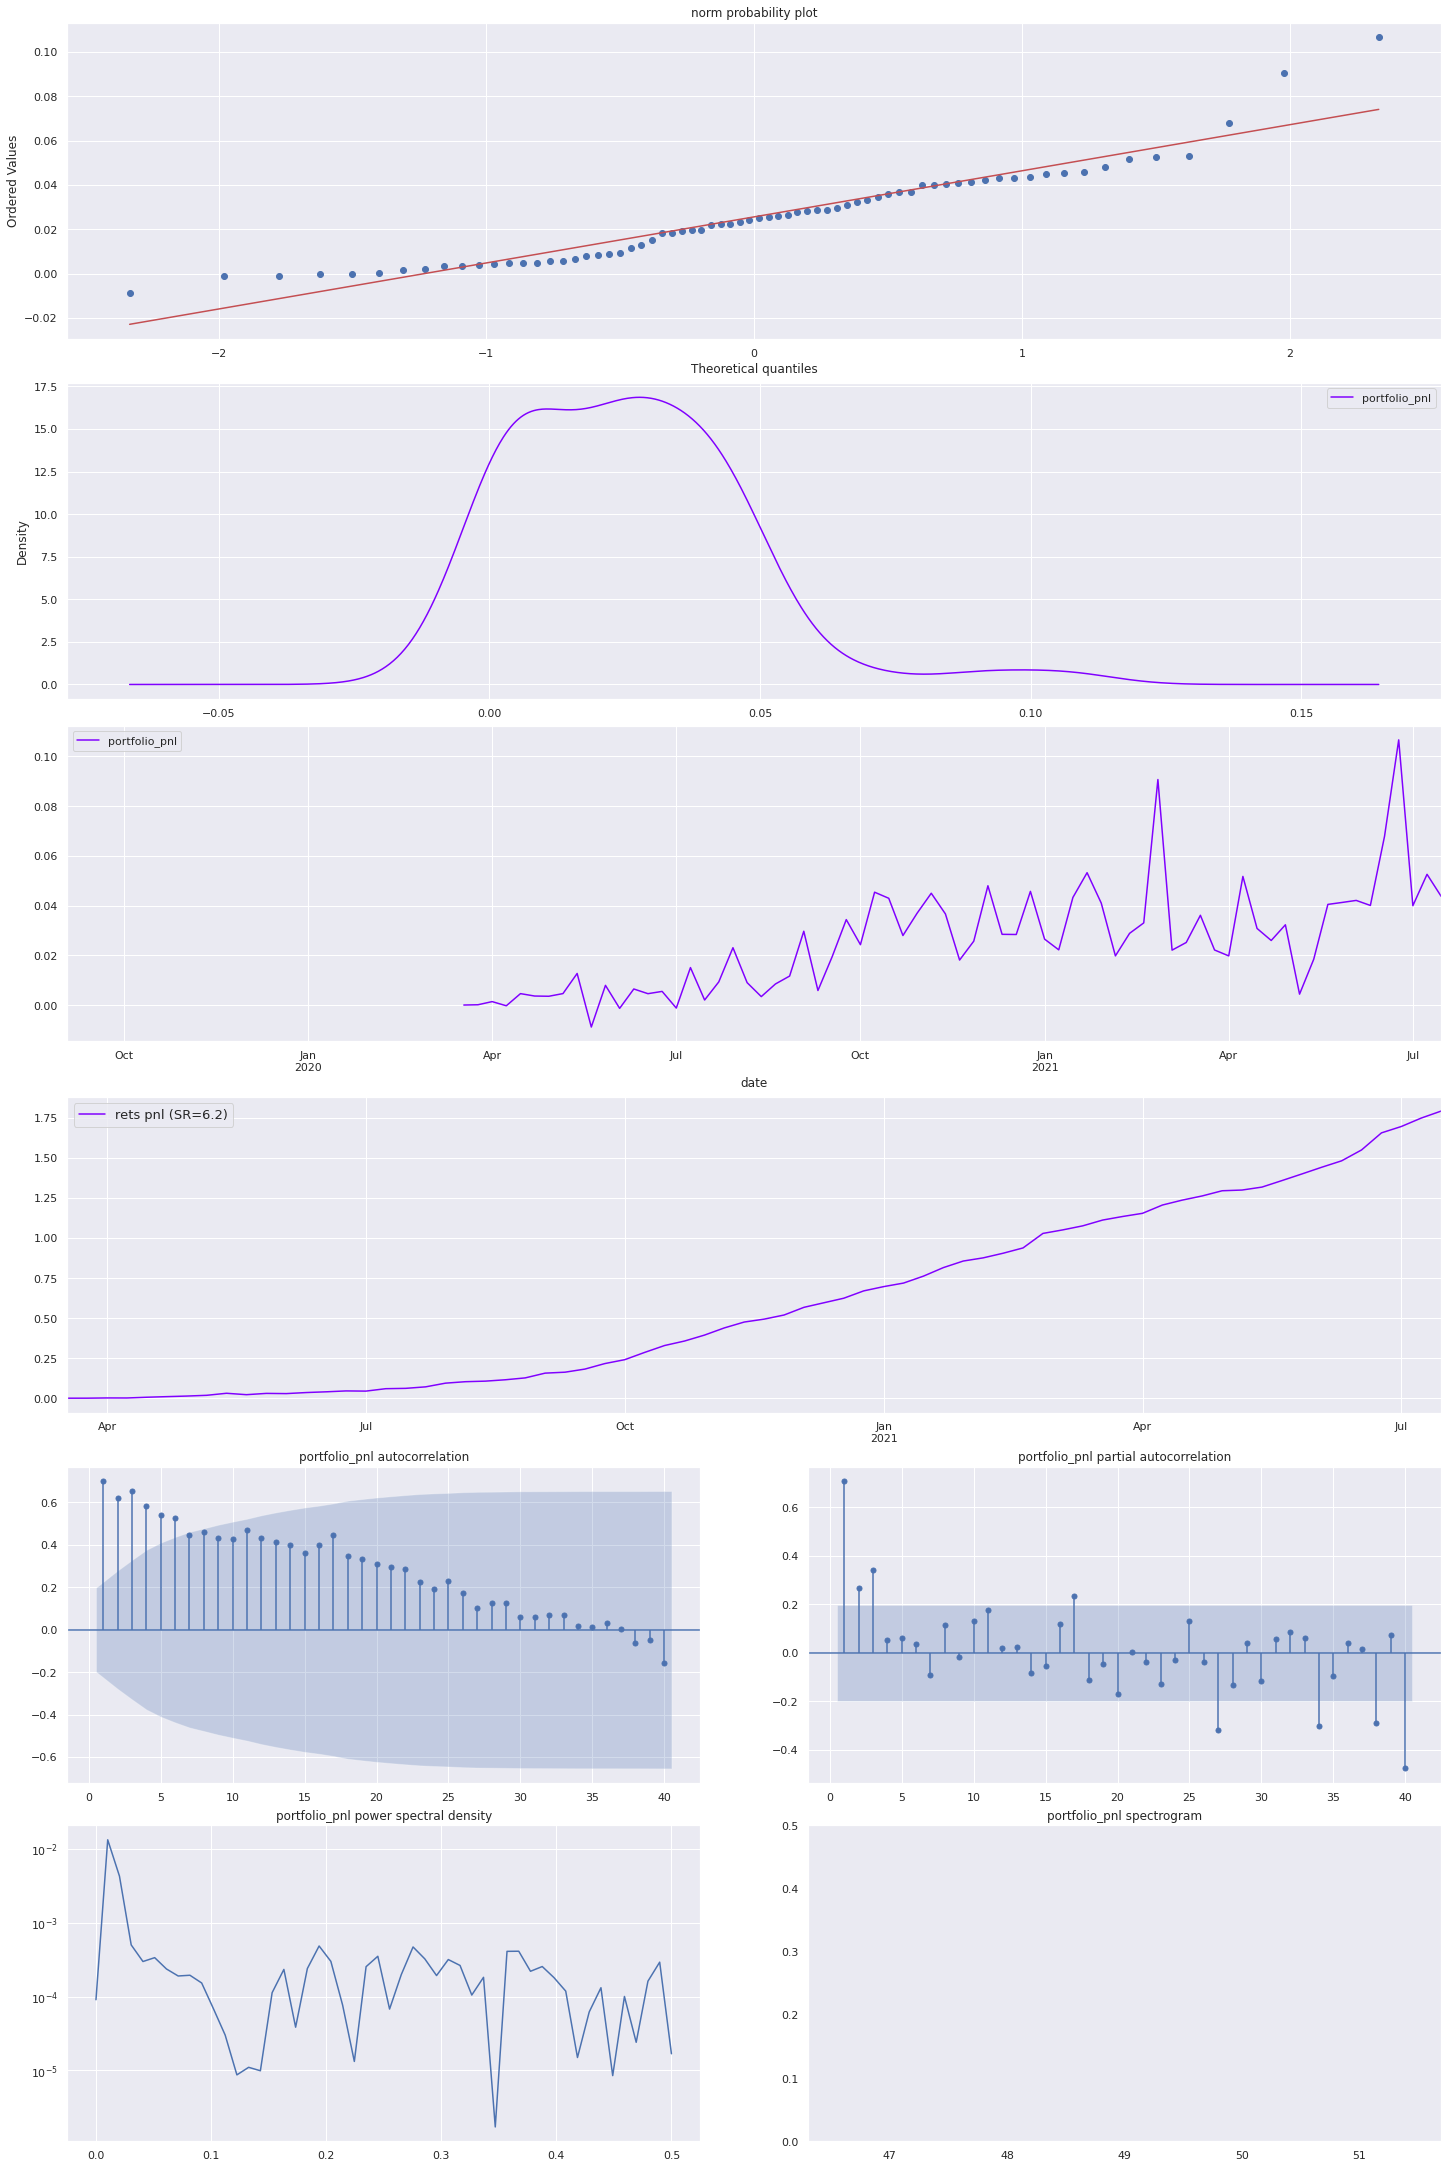

In [13]:
plotter.plot_rets_signal_analysis(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

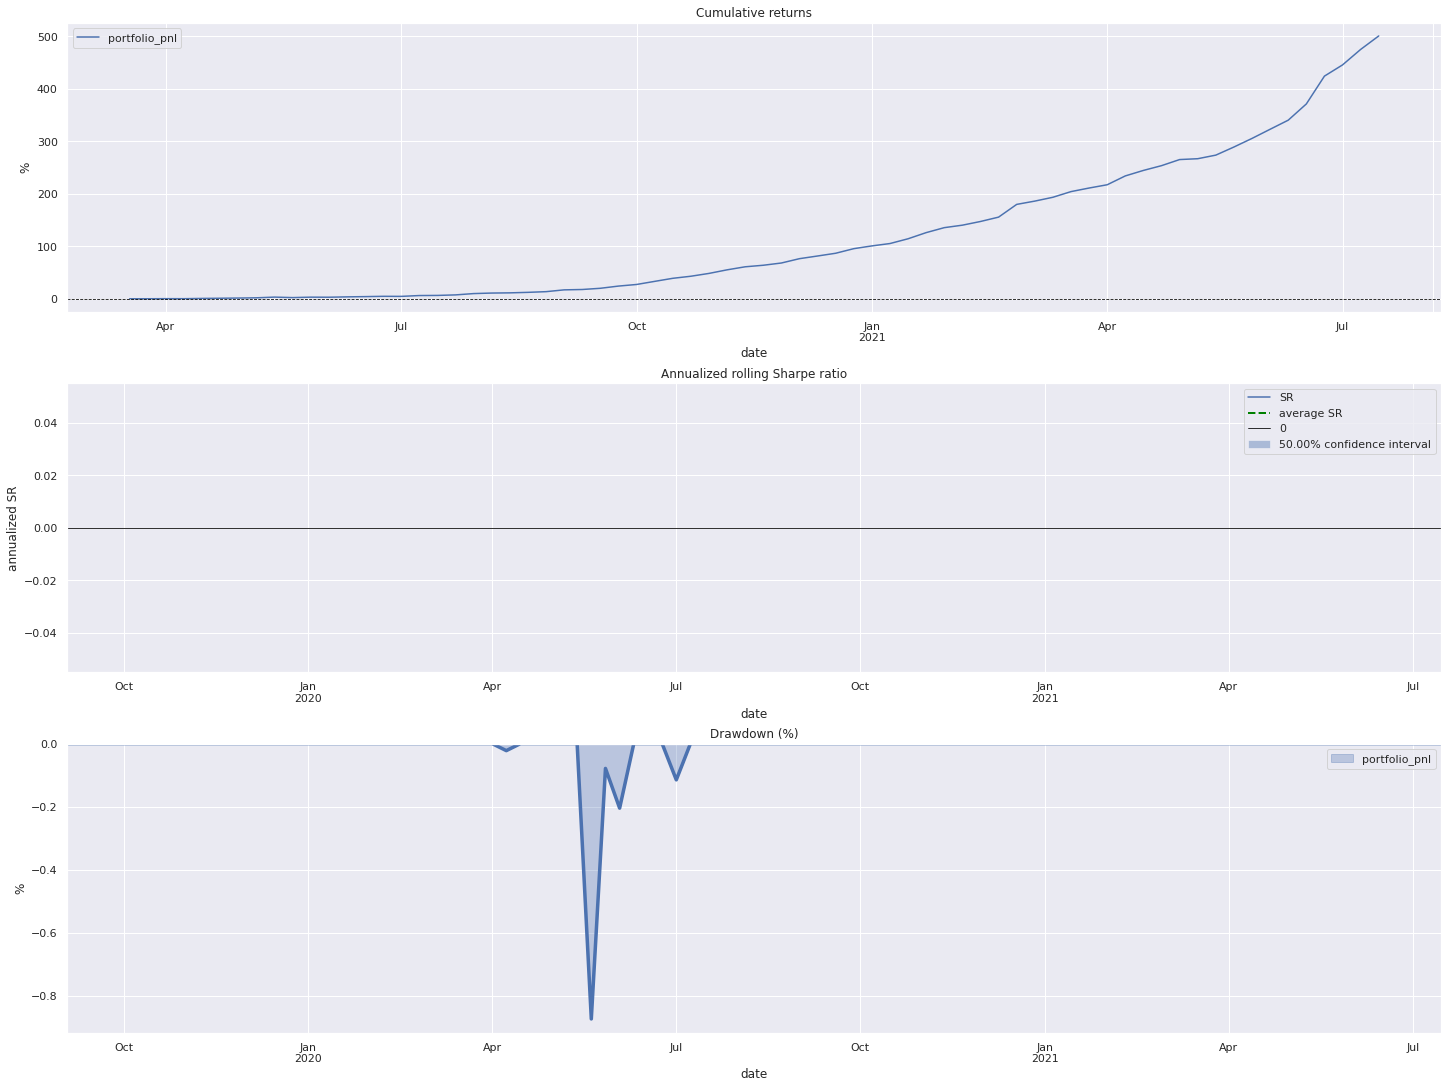

In [14]:
plotter.plot_performance(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

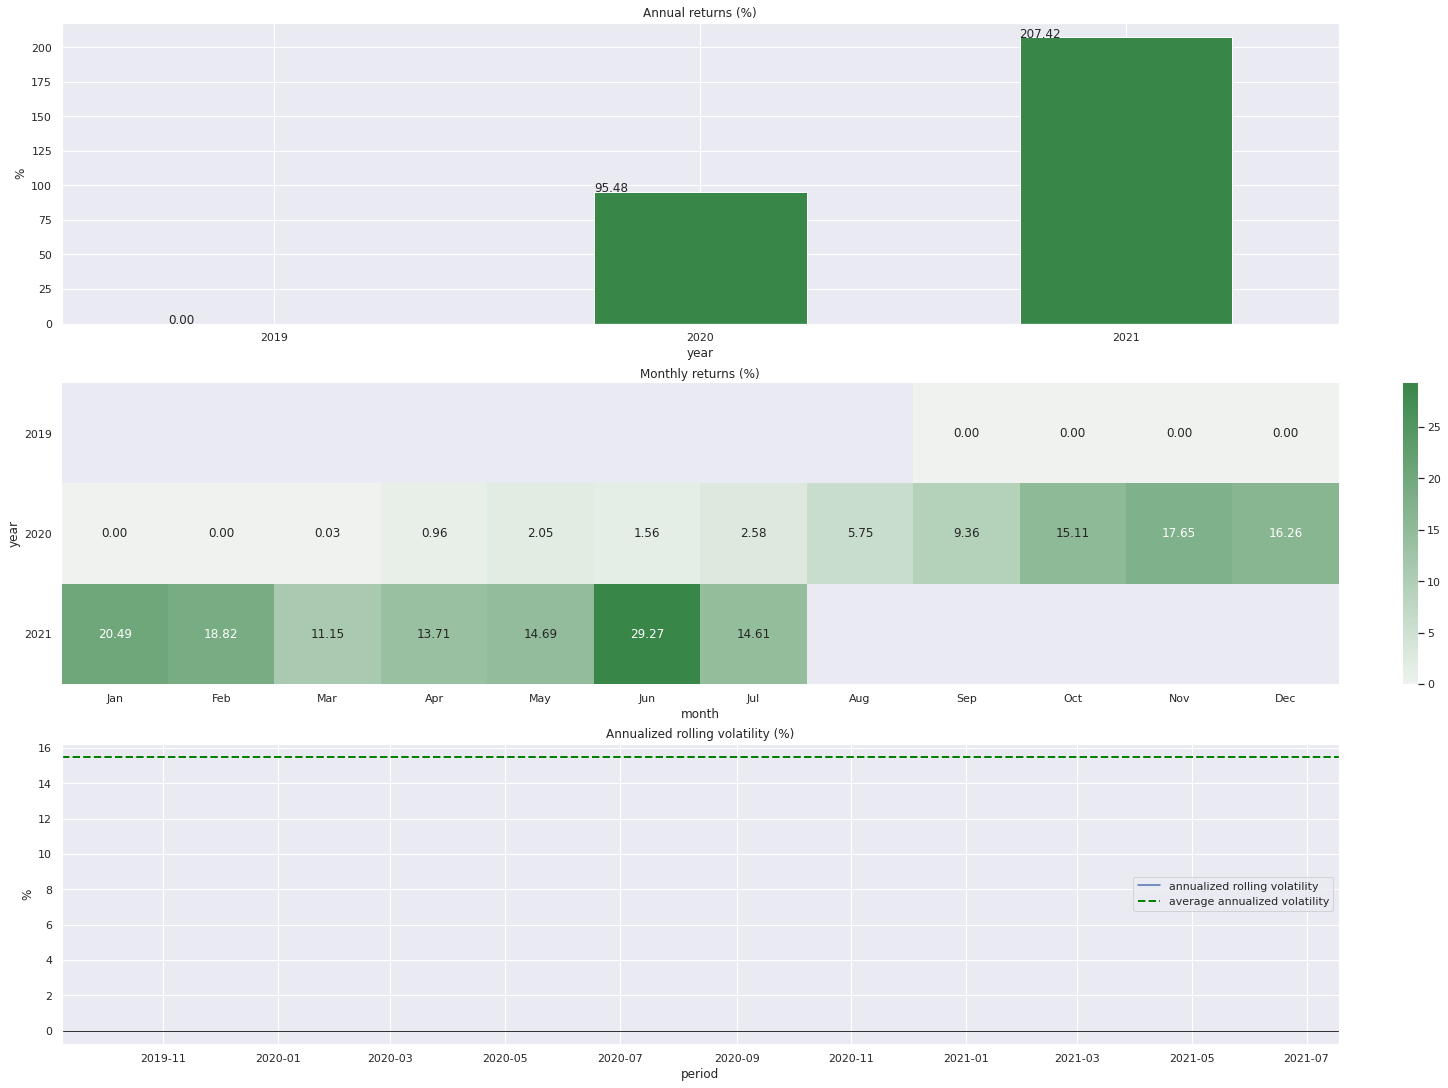

In [15]:
plotter.plot_rets_and_vol(
    keys=selected,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

Calculating positions:   0%|          | 0/40 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/40 [00:00<?, ?it/s]

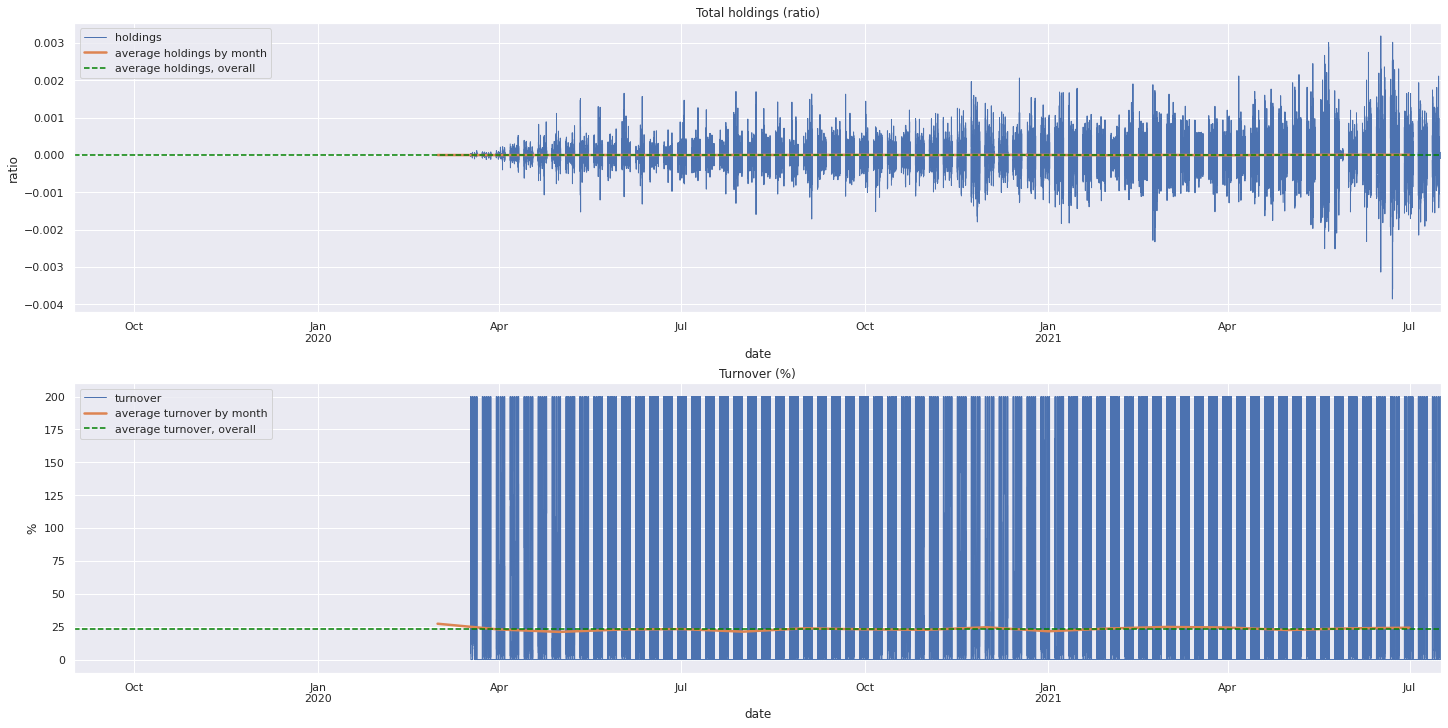

In [16]:
plotter.plot_positions(
    keys=selected,
    mode=eval_config["mode"],
    target_volatility=eval_config["target_volatility"],
)

Calculating positions:   0%|          | 0/1 [00:00<?, ?it/s]

Calculating PnL:   0%|          | 0/1 [00:00<?, ?it/s]

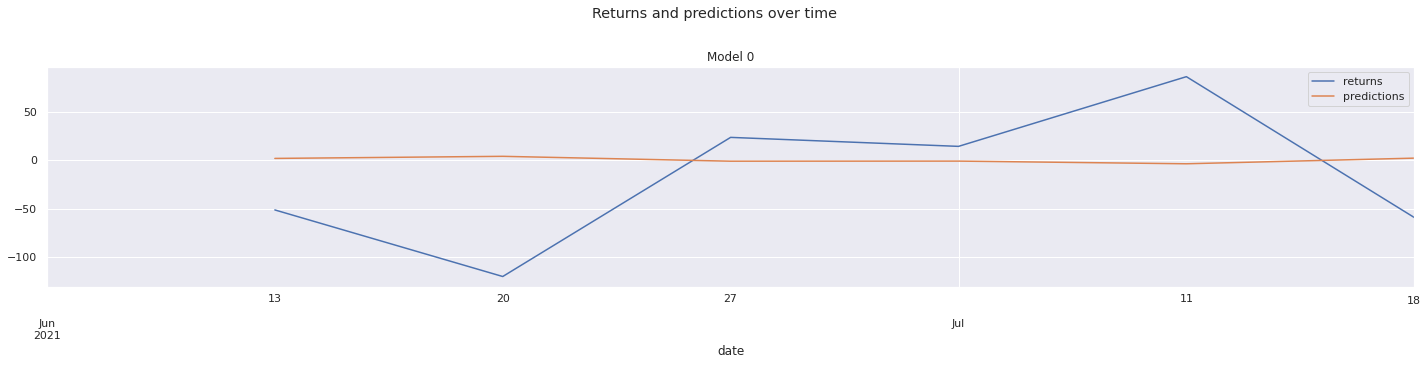

In [20]:
# Plot the returns and prediction for one or more models.
model_key = selected[:1]
plotter.plot_returns_and_predictions(
    keys=model_key,
    resample_rule=eval_config["resample_rule"],
    mode=eval_config["mode"],
)